In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
x = df.iloc[:,:-1]
y = df['Species']

In [5]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [7]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [9]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

1.0


0.9666666666666667

# CART (Regression)

In [10]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
x = df.iloc[:,:3]
y = df['PetalWidthCm']

In [12]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size= 0.2, random_state=1)

In [13]:
from sklearn.metrics import r2_score

In [14]:
dt = DecisionTreeRegressor()

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

r2_score(ytest,ypred)

0.8315919714050042

In [15]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

1.0


0.8315919714050042

# Hyperparameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [20]:
grid = GridSearchCV(DecisionTreeRegressor(), param_grid=params)

In [22]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [23]:
grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 6, 'splitter': 'best'}

In [24]:
dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, splitter='random')

In [25]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

0.9376000138585369


0.8942696323659783

In [26]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250

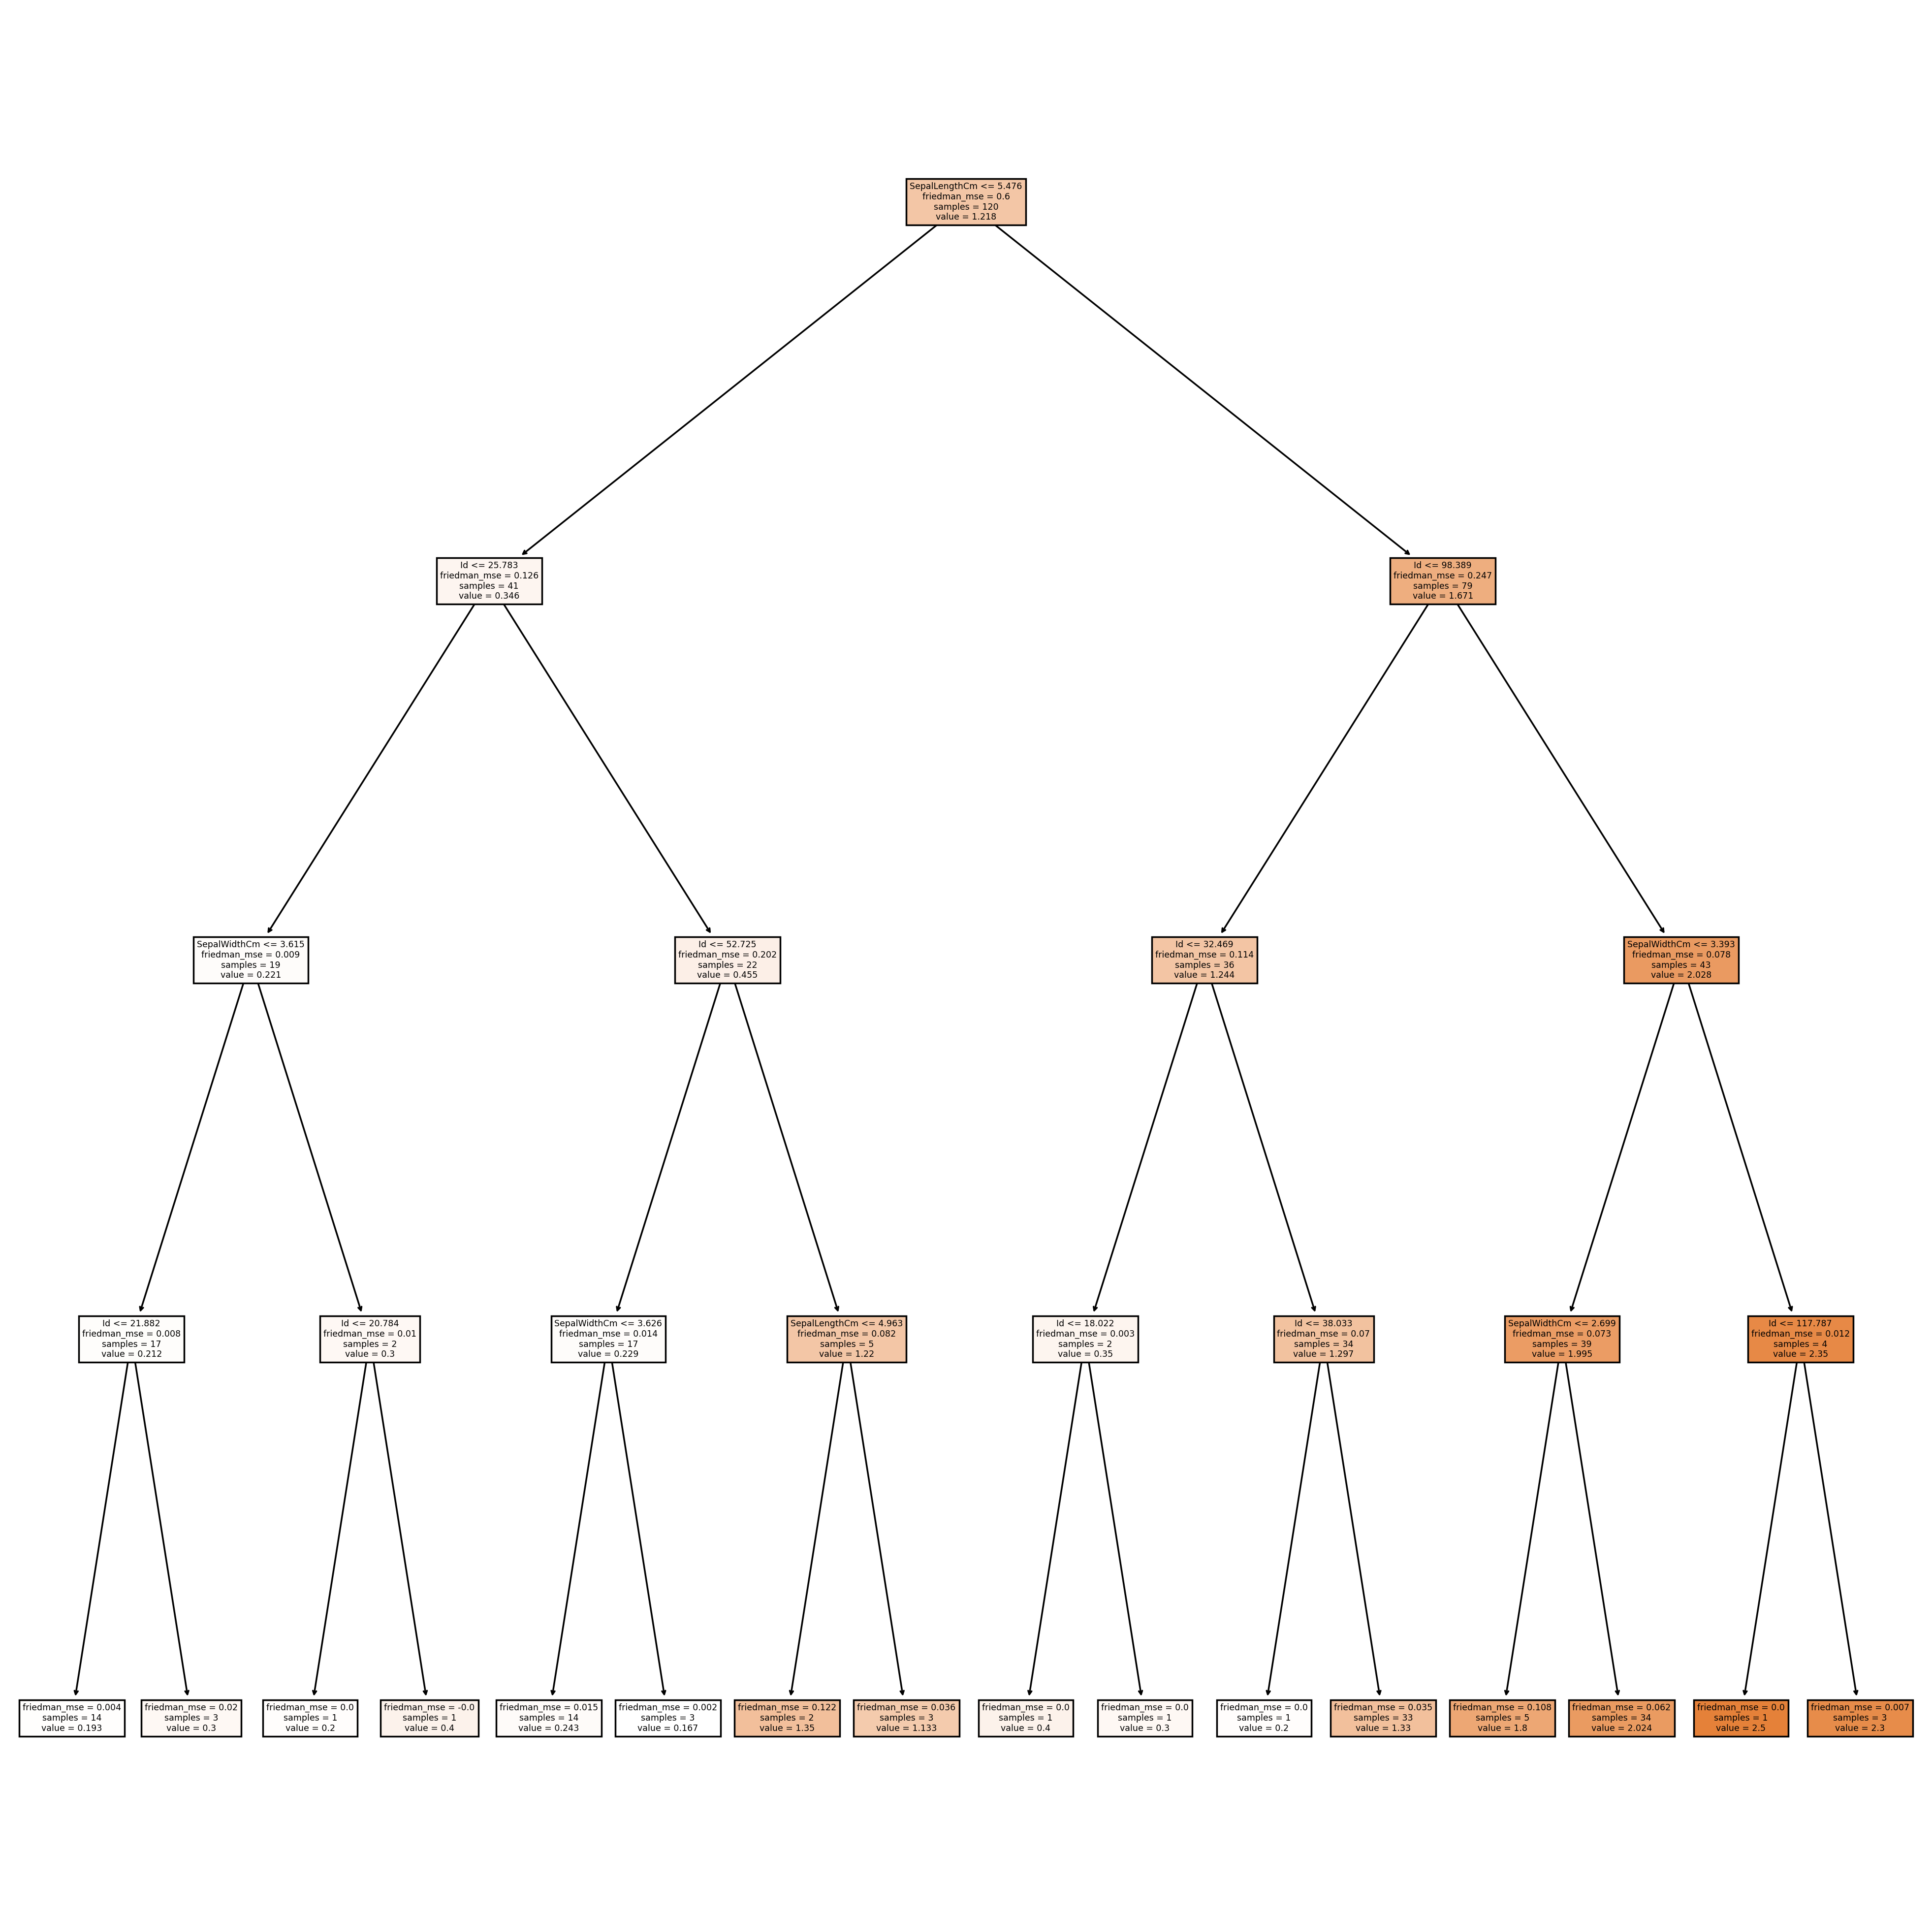

In [27]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()